# Mini project 3: The project

## Objective
We want to determine at which point the function 
$$
y=xe^{x^2},
$$

crosses the unit circle in the $x$-positive, $y$-positive quadrant using fixed-point simple iteration.

You should already have rewritten the problem 
in the form of a fixed-point problem, i.e. 
$$
x=g(x)
$$
that is suitable for iteration.

As well as the Guided Example for miniproject 3, the Guided Examples from miniprojects 1 and 2 can also be used as a guide for completing the tasks.

## The tasks
1. Plot the two curves to determine a starting point for iteration. Save the graph in a PDF file. 
*Hint: use `np.linspace` to generate an array with the x values. `np.exp` and `np.sqrt` returns an array with the exp and square root of the elements of the array given in input.* 
2. Write a function `myfun` that calculates $g(x)$. The function takes `x` and returns the value of the function at `x`.
3. Write a function `SimpleIter` that performs the simple iteration to find the abscissa of the intersection point. The function takes the initial guess `x0` and the tolerance `tol`. It returns the list of approximations generated by the simple iteration. To perform the iteration, use a `while` loop that performs
   $$
   x_n = g(x_{n-1}),
   $$
   while the absolute difference between the approximation of two successive approximation is larger than the tolerance.
5. Execute the `SimpleIter` using the starting approximation you estimated from the plot and setting the tolerance to `1e-15`. 
6. Consider the last value in the list of approximations generated by `SimpleIter` being the reference value. Generate the list of absolute errors, by taking the absolute value of the difference between the approximation and the reference value. 
*Hint: note that if you subtract a number from a list, it returns a list in which the number is subtracted from each element, similarly taking the absolute value of a list returns the list of the absolute values of the elements).
7. Plot the error at iteration $n$ against the error at iteration $n - 1$. Save the graph into a PDF file.  

# Python code


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# plotting the curves to determine intial starting point that i can use for 
# fixed point iteration's initial approximation. 
x_values = np.linspace(0, 1, 1000)
y_function = x_values * np.exp(x_values**2)
y_circle = np.sqrt(1 - x_values**2)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_function, label='y = xe^{x^2}')
plt.plot(x_values, y_circle, label='y = unit circle')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Functions')
plt.legend()
plt.grid(True)
plt.savefig('miniproject_3/curve_plot.pdf')
plt.close()
plt.show()

Total iterations: 39
Final approximation: 0.5808750357617376


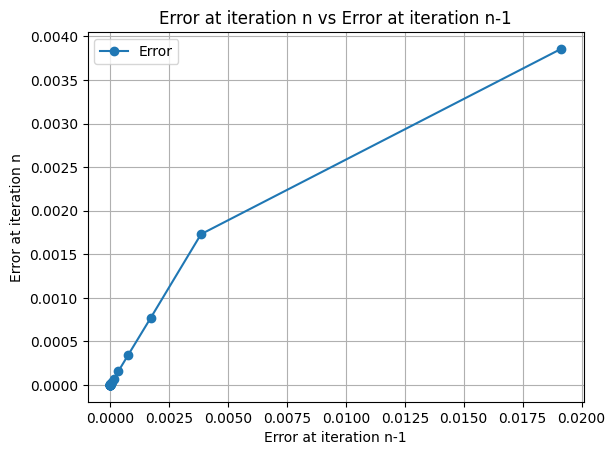

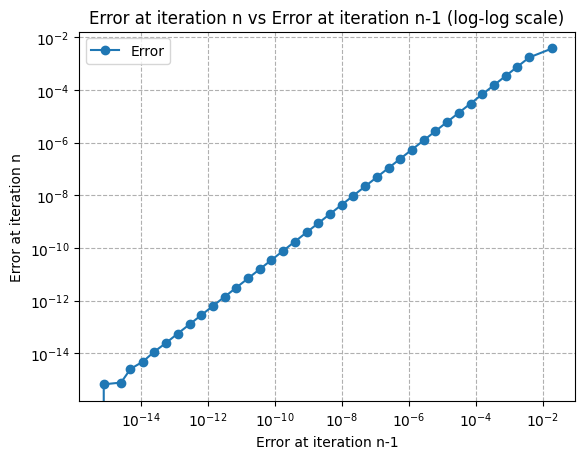

In [51]:
import numpy as np
import matplotlib.pyplot as plt

####################
# define functions #
####################

# g(x) for fixed-point iteration was obtained by substituting y = x * e^(x^2) into the equation of the unit circle, x^2 + y^2 = 1, and solving for x.
# this is used in the iteration process.
def myfun(x):
    return np.sqrt(1/(np.exp(2 * x**2) + 1))

# function to perform simple iteration using initial guess x0 -> continues until change between successive approximations is smaller than tol.
def SimpleIter(x0, tol):
    x_prev = x0
    x_next = myfun(x_prev)
    approximations = [x_prev]

    # runs functions while the absolute error is greater than the tolerance
    while abs(x_next - x_prev) > tol:
        x_prev = x_next
        x_next = myfun(x_prev)
        approximations.append(x_next)
    return approximations

################
# MAIN SCRIPT! #
################

# execute the SimpleIter function
x0 = 0.6 # initial guess from the plot
tol = 1e-15
approximations = SimpleIter(x0, tol)

# calc error by taking the absolute diff of previous number and current approximation
ref_value = approximations[-1]
errors = np.abs(np.array(approximations) - ref_value)

print(f"Total iterations: {len(approximations) - 1}")
print(f"Final approximation: {approximations[-1]}")

############
# plotting #
############
x_vals = errors[:-1]  # error at iteration n-1
y_vals = errors[1:]   # error at iteration n

# create plot 1
plt.plot(x_vals, y_vals, 'o-', label='Error')
plt.xlabel('Error at iteration n-1')
plt.ylabel('Error at iteration n')
plt.title('Error at iteration n vs Error at iteration n-1')
plt.legend()
plt.grid(True)
plt.savefig('miniproject_3/error_plot.pdf')
plt.show()

# Log-log scale plot
plt.loglog(x_vals, y_vals, 'o-', label='Error')
plt.xlabel('Error at iteration n-1')
plt.ylabel('Error at iteration n')
plt.title('Error at iteration n vs Error at iteration n-1 (log-log scale)')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.savefig('miniproject_3/error_plot_loglog.pdf')
plt.show()


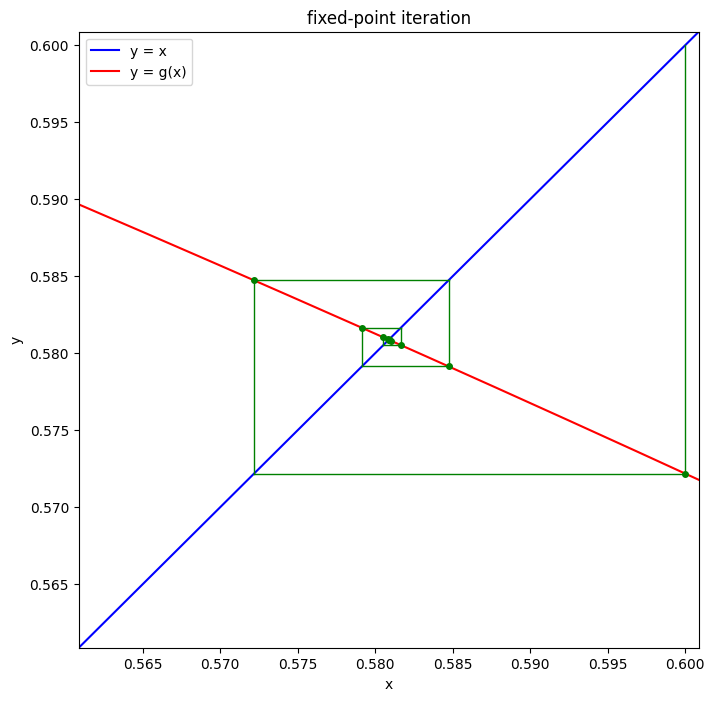

In [64]:
# extra task: visulisaing fixed point iteration like in the notes
# https://relate.cs.illinois.edu/course/cs450-s21/file-version/2ee0c9a85407c7a1eb280c5fac6f7007b5c5951d/demos/upload/05-nonlinear-equations/Fixed%20point%20iteration.html

# from above
fixed_point = SimpleIter(x0, 1e-15)[-1]

# create x values around the fixed point
x = np.linspace(fixed_point - 0.02, fixed_point + 0.02, 1000)
fig, ax = plt.subplots(figsize=(8, 8))

# plot y = x line
ax.plot(x, x, 'b-', label='y = x')

# plot y = g(x) line
ax.plot(x, myfun(x), 'r-', label='y = g(x)')
x_current = x0
num_iterations = 10

for i in range(num_iterations):
    y_current = myfun(x_current)
    ax.plot([x_current, x_current, y_current], [x_current, y_current, y_current], 'g-', linewidth=1)
    ax.plot(x_current, y_current, 'go', markersize=4)
    x_current = y_current

# set plot labels, title, and limits
ax.set(xlabel='x', ylabel='y', title='fixed-point iteration',
       xlim=(x.min(), x.max()), ylim=(x.min(), x.max()))


ax.legend()
plt.savefig('miniproject_3/fixed_point_iteration.pdf')
plt.show()